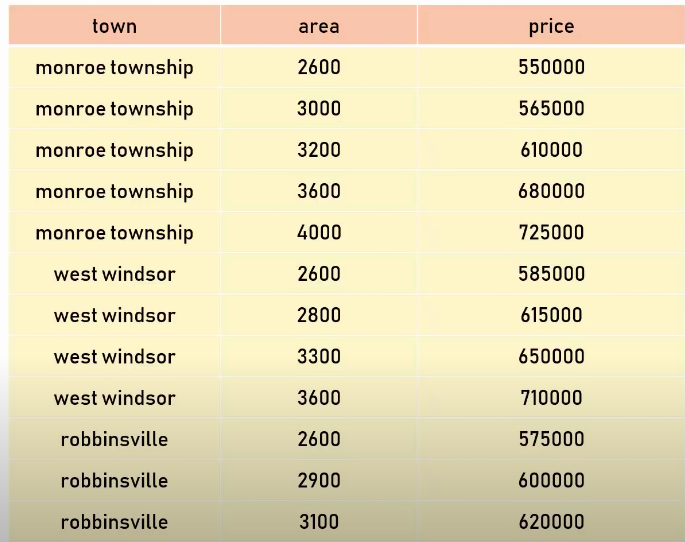


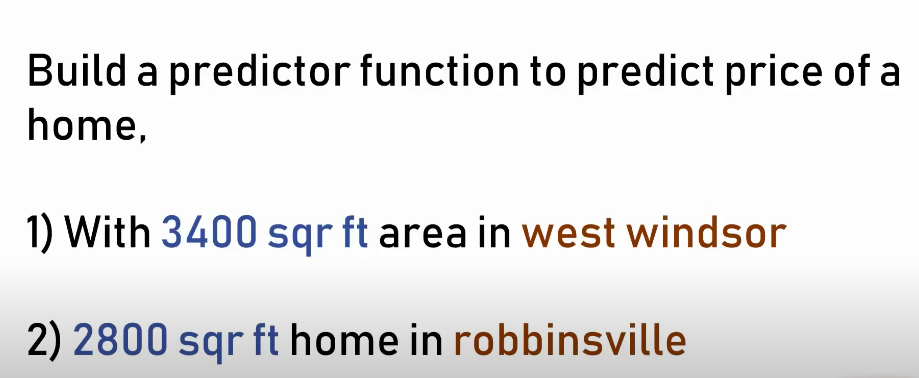

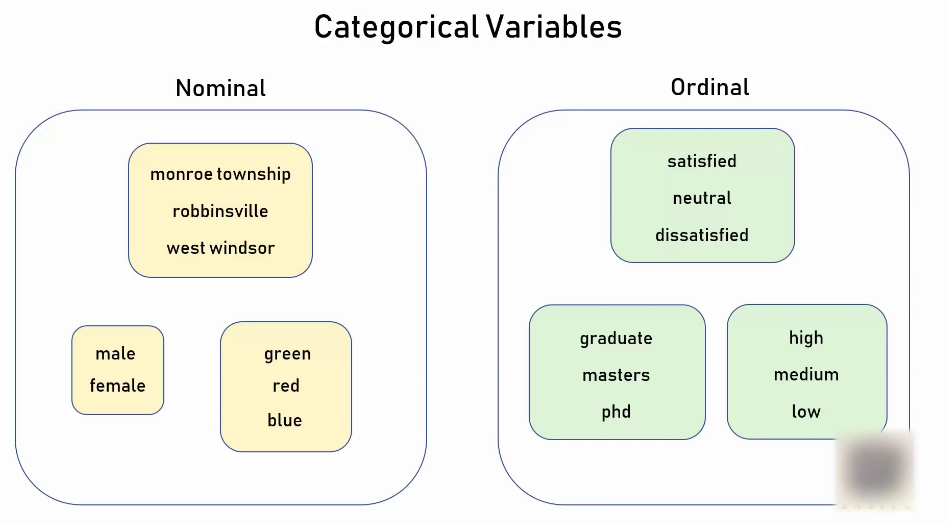

### Creating Dummy Variables by Pandas Get Dummy

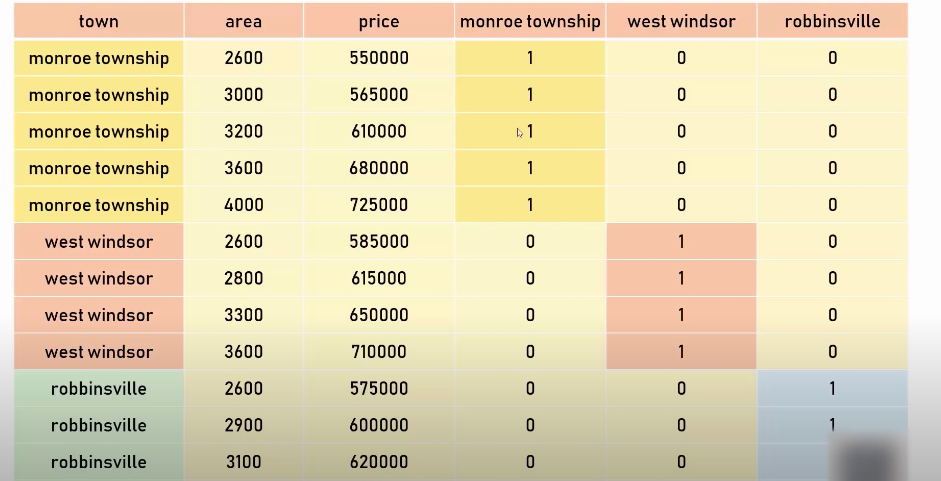

In [2]:
import pandas as pd
df = pd.read_csv("homeprice.csv")
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


### Creating Dummy Variables

In [4]:
dummies= pd.get_dummies(df.town)
dummies

,monroe township,robinsville,west windsor
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
5,0,0,1
6,0,0,1
7,0,0,1
8,0,0,1
9,0,1,0


### Joining the two data frames

In [5]:
merged = pd.concat([df, dummies], axis='columns') # Column wise
merged

,town,area,price,monroe township,robinsville,west windsor
0,monroe township,2600,550000,1,0,0
1,monroe township,3000,565000,1,0,0
2,monroe township,3200,610000,1,0,0
3,monroe township,3600,680000,1,0,0
4,monroe township,4000,725000,1,0,0
5,west windsor,2600,585000,0,0,1
6,west windsor,2800,615000,0,0,1
7,west windsor,3300,650000,0,0,1
8,west windsor,3600,710000,0,0,1
9,robinsville,2600,575000,0,1,0


### Droping the original Column and one of the dummy Variables Column to remove dummy trap

In [6]:
final = merged.drop(['town', 'west windsor'], axis='columns')
final

,area,price,monroe township,robinsville
0,2600,550000,1,0
1,3000,565000,1,0
2,3200,610000,1,0
3,3600,680000,1,0
4,4000,725000,1,0
5,2600,585000,0,0
6,2800,615000,0,0
7,3300,650000,0,0
8,3600,710000,0,0
9,2600,575000,0,1


In [7]:
from sklearn.linear_model import LinearRegression
model = LinearRegression() 

In [8]:
X = final.drop('price', axis= 'columns')
X

,area,monroe township,robinsville
0,2600,1,0
1,3000,1,0
2,3200,1,0
3,3600,1,0
4,4000,1,0
5,2600,0,0
6,2800,0,0
7,3300,0,0
8,3600,0,0
9,2600,0,1


In [9]:
Y = final.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [10]:
model.fit(X,Y)

LinearRegression()

In [11]:
model.predict([[2800,0,1]]) # predicting price in robinsville so
                            # it is 1, rest of the town is 0
    

array([590775.63964739])

In [12]:
model.predict([[3400,0,0]]) # for west windsor

array([681241.66845839])

### To Check the Accuracy

In [13]:
model.score(X,Y)

0.9573929037221873

## Creating Dummy varibables by ONE Hot Encoding

In [14]:
df

,town,area,price
0,monroe township,2600,550000
1,monroe township,3000,565000
2,monroe township,3200,610000
3,monroe township,3600,680000
4,monroe township,4000,725000
5,west windsor,2600,585000
6,west windsor,2800,615000
7,west windsor,3300,650000
8,west windsor,3600,710000
9,robinsville,2600,575000


In [15]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [16]:
dfle = df
dfle.town = le.fit_transform(dfle.town) #Enconding the town column
dfle

,town,area,price
0,0,2600,550000
1,0,3000,565000
2,0,3200,610000
3,0,3600,680000
4,0,4000,725000
5,2,2600,585000
6,2,2800,615000
7,2,3300,650000
8,2,3600,710000
9,1,2600,575000


In [18]:
X = dfle[['town','area']].values # Converting to a 2D array
X

array([[   0, 2600],
       [   0, 3000],
       [   0, 3200],
       [   0, 3600],
       [   0, 4000],
       [   2, 2600],
       [   2, 2800],
       [   2, 3300],
       [   2, 3600],
       [   1, 2600],
       [   1, 2900],
       [   1, 3100],
       [   1, 3600]])

In [19]:
Y = dfle.price
Y

0     550000
1     565000
2     610000
3     680000
4     725000
5     585000
6     615000
7     650000
8     710000
9     575000
10    600000
11    620000
12    695000
Name: price, dtype: int64

In [21]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
#ohe = OneHotEncoder(categorical_features=[0]) # Oth column has the 
                                               #categorical Feature
    
ohe = ColumnTransformer([("town", OneHotEncoder(), [0])], remainder = 'passthrough')    

In [27]:
X = ohe.fit_transform(X)
X

array([[0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 1.0e+00, 0.0e+00, 0.0e+00, 4.0e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 2.8e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 3.3e+03],
       [1.0e+00, 0.0e+00, 0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 1.0e+00, 0.0e+00, 3.6e+03]])

In [28]:
X = X[:,2:] # take all rows, take all the columns from index 2 
                                    # 0th and 1th column baad        
X    

array([[0.0e+00, 0.0e+00, 2.6e+03],
       [0.0e+00, 0.0e+00, 3.0e+03],
       [0.0e+00, 0.0e+00, 3.2e+03],
       [0.0e+00, 0.0e+00, 3.6e+03],
       [0.0e+00, 0.0e+00, 4.0e+03],
       [0.0e+00, 1.0e+00, 2.6e+03],
       [0.0e+00, 1.0e+00, 2.8e+03],
       [0.0e+00, 1.0e+00, 3.3e+03],
       [0.0e+00, 1.0e+00, 3.6e+03],
       [1.0e+00, 0.0e+00, 2.6e+03],
       [1.0e+00, 0.0e+00, 2.9e+03],
       [1.0e+00, 0.0e+00, 3.1e+03],
       [1.0e+00, 0.0e+00, 3.6e+03]])

In [29]:
model.fit(X,Y)

LinearRegression()

In [30]:
model.predict([[1,0,2800]]) # home in robinsville 

array([590775.63964739])